In [3]:
print("This is 1st demo for EDA ")

This is 1st demo for EDA 


In [4]:
!pip install pandas numpy matplotlib seaborn scikit-learn

  Using cached pandas-2.3.1-cp313-cp313-macosx_11_0_arm64.whl.metadata (91 kB)
  Using cached numpy-2.3.2-cp313-cp313-macosx_14_0_arm64.whl.metadata (62 kB)
  Using cached matplotlib-3.10.5-cp313-cp313-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached scikit_learn-1.7.1-cp313-cp313-macosx_12_0_arm64.whl.metadata (11 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.3.3-cp313-cp313-macosx_11_0_arm64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.59.0-cp313-cp313-macosx_10_13_universal2.whl.metadata (107 kB)
  Using cached pillow-11.3.0-cp313-cp313-macosx_11_0_arm64.whl.metadata (9.0 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
  Using cached scipy-1.16.1-cp313-cp313-macosx_14_0_arm64.whl.metadata (61 kB)
  Using cache

In [5]:
!pip install --upgrade pip

  Using cached pip-25.2-py3-none-any.whl.metadata (4.7 kB)
Using cached pip-25.2-py3-none-any.whl (1.8 MB)
  Attempting uninstall: pip
    Found existing installation: pip 25.1.1
    Uninstalling pip-25.1.1:
      Successfully uninstalled pip-25.1.1


In [7]:
!pip install -r  requirements.txt

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

import joblib

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [2]:
# Generate sample loan approval data
np.random.seed(42)
n_samples = 1000

data = {
    'Loan_ID': [f'LP{str(i).zfill(6)}' for i in range(1, n_samples + 1)],
    'Gender': np.random.choice(['Male', 'Female'], n_samples, p=[0.6, 0.4]),
    'Married': np.random.choice(['Yes', 'No'], n_samples, p=[0.7, 0.3]),
    'Dependents': np.random.choice(['0', '1', '2', '3+'], n_samples, p=[0.4, 0.3, 0.2, 0.1]),
    'Education': np.random.choice(['Graduate', 'Not Graduate'], n_samples, p=[0.8, 0.2]),
    'Self_Employed': np.random.choice(['Yes', 'No'], n_samples, p=[0.15, 0.85]),
    'ApplicantIncome': np.random.normal(5000, 2000, n_samples).astype(int),
    'CoapplicantIncome': np.random.exponential(1500, n_samples).astype(int),
    'LoanAmount': np.random.normal(150, 50, n_samples).astype(int),
    'Loan_Amount_Term': np.random.choice([360, 180, 240, 300], n_samples, p=[0.8, 0.1, 0.05, 0.05]),
    'Credit_History': np.random.choice([1.0, 0.0], n_samples, p=[0.85, 0.15]),
    'Property_Area': np.random.choice(['Urban', 'Semiurban', 'Rural'], n_samples, p=[0.4, 0.35, 0.25])
}

# Create loan status based on some logic
loan_status = []
for i in range(n_samples):
    score = 0
    if data['Credit_History'][i] == 1.0:
        score += 3
    if data['Education'][i] == 'Graduate':
        score += 1
    if data['Married'][i] == 'Yes':
        score += 1
    if data['ApplicantIncome'][i] > 4000:
        score += 1
    if data['LoanAmount'][i] < 200:
        score += 1
    
    # Add some randomness
    if np.random.random() < 0.1:
        score = np.random.randint(0, 6)
    
    loan_status.append('Y' if score >= 3 else 'N')

data['Loan_Status'] = loan_status

# Create DataFrame
df = pd.DataFrame(data)

# Introduce some missing values
missing_indices = np.random.choice(df.index, size=int(0.05 * len(df)), replace=False)
df.loc[missing_indices[:len(missing_indices)//3], 'Gender'] = np.nan
df.loc[missing_indices[len(missing_indices)//3:2*len(missing_indices)//3], 'LoanAmount'] = np.nan
df.loc[missing_indices[2*len(missing_indices)//3:], 'Credit_History'] = np.nan

print(f"Dataset created with {len(df)} rows and {len(df.columns)} columns")
df.head()

Dataset created with 1000 rows and 13 columns


Loan_ID  Gender Married Dependents Education Self_Employed  \
0  LP000001    Male     Yes          0  Graduate            No   
1  LP000002  Female     Yes          0  Graduate            No   
2  LP000003  Female      No         3+  Graduate            No   
3  LP000004    Male      No          0  Graduate            No   
4  LP000005    Male      No          0  Graduate           Yes   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             3806                101       142.0               360   
1              219               1195       152.0               360   
2             4175               1340       201.0               360   
3             6826               1586       140.0               360   
4             6075                442       121.0               360   

   Credit_History Property_Area Loan_Status  
0             1.0     Semiurban           Y  
1             1.0     Semiurban           Y  
2             1.0         Urban           Y  
3             1.0         Rural           Y  
4             1.0         Urban           Y

In [3]:
print("Dataset Shape:", df.shape)
print("\nColumn Information:")
df.info()

Dataset Shape: (1000, 13)

Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            1000 non-null   object 
 1   Gender             984 non-null    object 
 2   Married            1000 non-null   object 
 3   Dependents         1000 non-null   object 
 4   Education          1000 non-null   object 
 5   Self_Employed      1000 non-null   object 
 6   ApplicantIncome    1000 non-null   int64  
 7   CoapplicantIncome  1000 non-null   int64  
 8   LoanAmount         983 non-null    float64
 9   Loan_Amount_Term   1000 non-null   int64  
 10  Credit_History     983 non-null    float64
 11  Property_Area      1000 non-null   object 
 12  Loan_Status        1000 non-null   object 
dtypes: float64(2), int64(3), object(8)
memory usage: 101.7+ KB


In [4]:
print("Missing Values:")
print(df.isnull().sum())
print(f"\nMissing Values Percentage:")
print((df.isnull().sum() / len(df) * 100).round(2))

Missing Values:
Loan_ID               0
Gender               16
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           17
Loan_Amount_Term      0
Credit_History       17
Property_Area         0
Loan_Status           0
dtype: int64

Missing Values Percentage:
Loan_ID              0.0
Gender               1.6
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           1.7
Loan_Amount_Term     0.0
Credit_History       1.7
Property_Area        0.0
Loan_Status          0.0
dtype: float64


In [5]:
print("Numerical Features Statistics:")
df.describe()

Numerical Features Statistics:


ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count      1000.000000        1000.000000  983.000000       1000.000000   
mean       4895.798000        1473.488000  147.715158        333.120000   
std        1998.877777        1430.316416   50.920891         59.101257   
min       -1353.000000           0.000000    5.000000        180.000000   
25%        3634.500000         432.000000  113.000000        360.000000   
50%        4975.500000         999.000000  147.000000        360.000000   
75%        6266.250000        2126.500000  184.000000        360.000000   
max       11304.000000       10710.000000  304.000000        360.000000   

       Credit_History  
count      983.000000  
mean         0.861648  
std          0.345445  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000

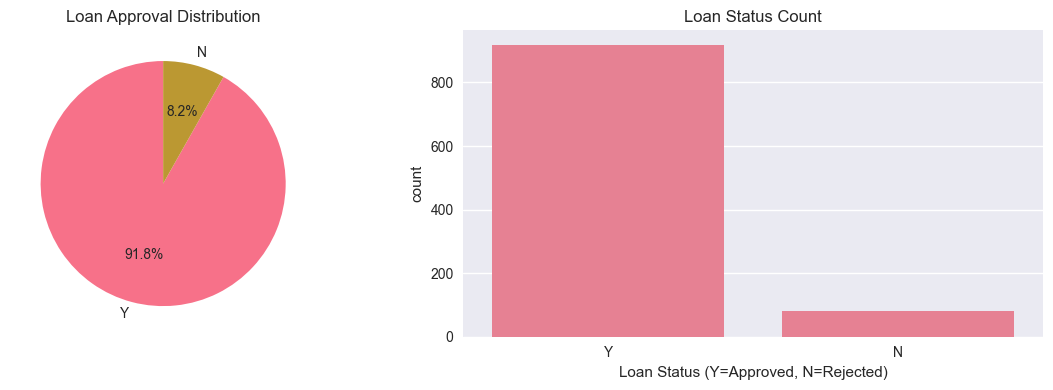

Loan Approval Rate: 91.80%


In [6]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
loan_counts = df['Loan_Status'].value_counts()
plt.pie(loan_counts.values, labels=loan_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Loan Approval Distribution')

plt.subplot(1, 2, 2)
sns.countplot(data=df, x='Loan_Status')
plt.title('Loan Status Count')
plt.xlabel('Loan Status (Y=Approved, N=Rejected)')

plt.tight_layout()
plt.show()

print(f"Loan Approval Rate: {(df['Loan_Status'] == 'Y').mean():.2%}")

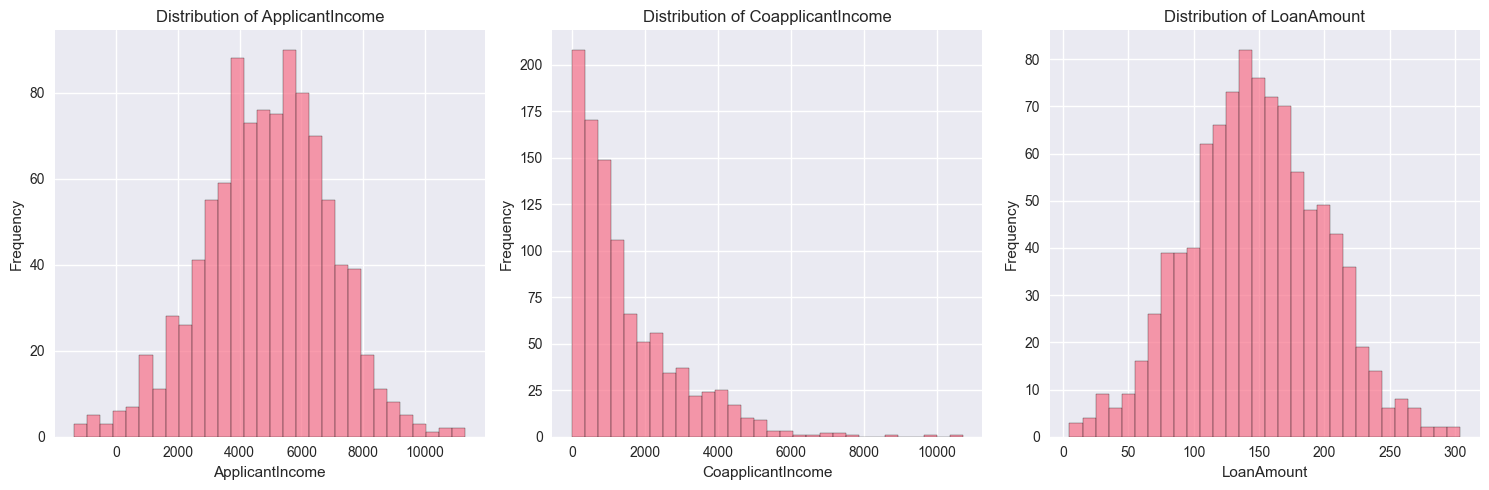

In [7]:
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, 3, i+1)
    plt.hist(df[col].dropna(), bins=30, alpha=0.7, edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

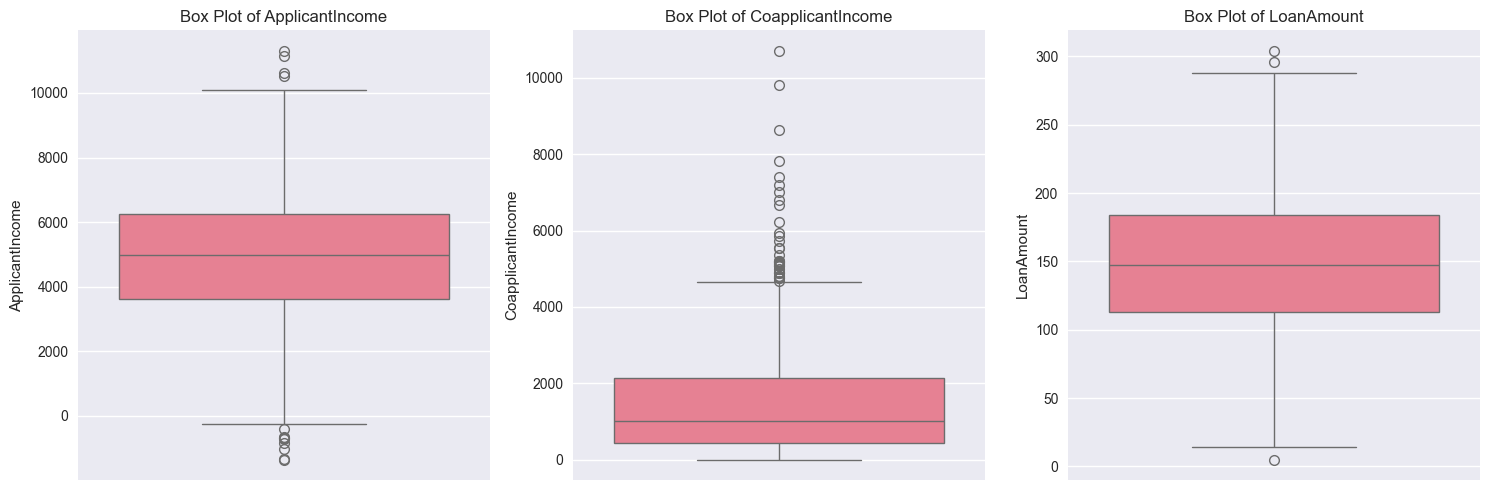

In [8]:
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()

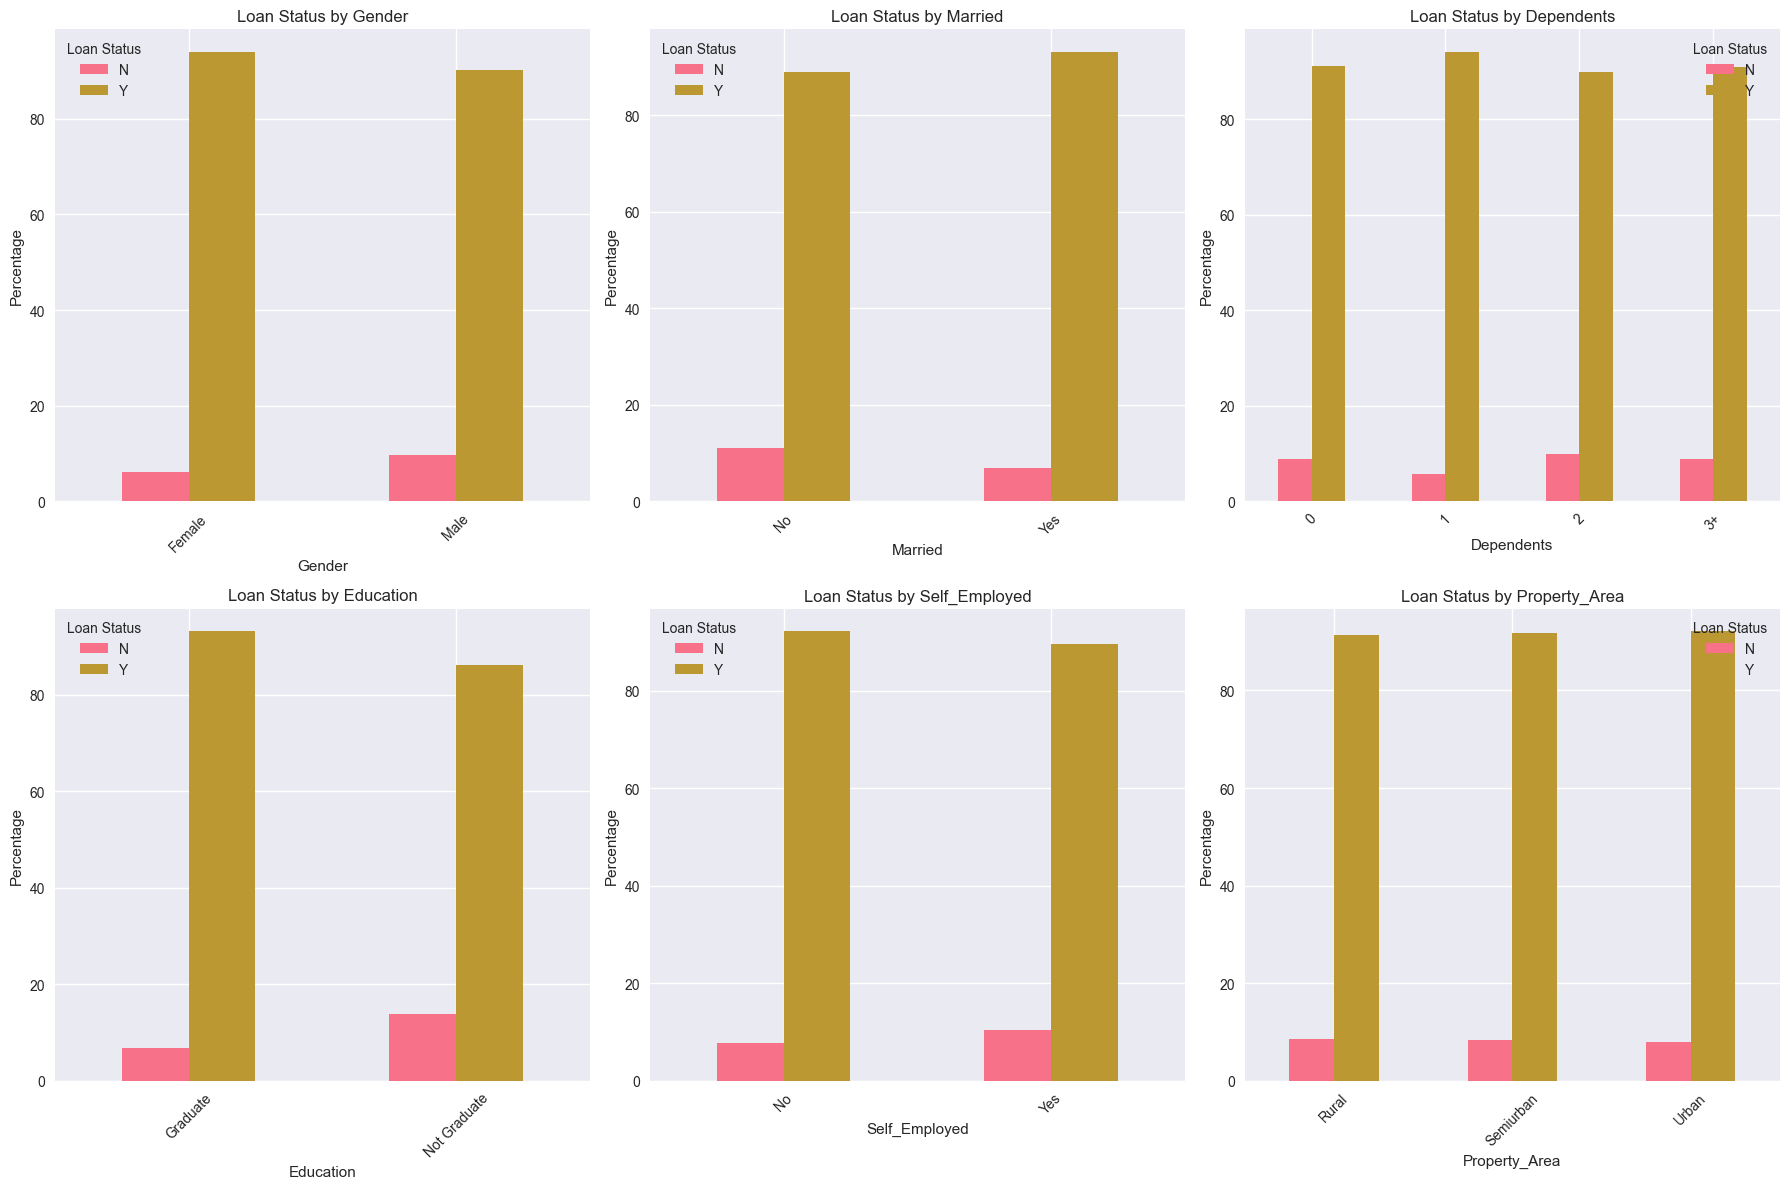

In [9]:
categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']

plt.figure(figsize=(18, 12))
for i, col in enumerate(categorical_features):
    plt.subplot(2, 3, i+1)
    crosstab = pd.crosstab(df[col], df['Loan_Status'], normalize='index') * 100
    crosstab.plot(kind='bar', ax=plt.gca())
    plt.title(f'Loan Status by {col}')
    plt.xlabel(col)
    plt.ylabel('Percentage')
    plt.legend(title='Loan Status')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [10]:
# Create a copy for preprocessing
df_model = df.copy()

# Handle missing values
df_model['Gender'].fillna(df_model['Gender'].mode()[0], inplace=True)
df_model['LoanAmount'].fillna(df_model['LoanAmount'].median(), inplace=True)
df_model['Credit_History'].fillna(df_model['Credit_History'].mode()[0], inplace=True)

print("Missing values after preprocessing:")
print(df_model.isnull().sum())

print("Shape after preprocessing:")
print(df_model.shape)

Missing values after preprocessing:
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64
Shape after preprocessing:
(1000, 13)


In [11]:
# Feature engineering
df_model['TotalIncome'] = df_model['ApplicantIncome'] + df_model['CoapplicantIncome']
df_model['Income_to_Loan_Ratio'] = df_model['TotalIncome'] / df_model['LoanAmount']

# Log transformation for skewed features
df_model['ApplicantIncome_log'] = np.log1p(df_model['ApplicantIncome'])
df_model['TotalIncome_log'] = np.log1p(df_model['TotalIncome'])

print("New features created:")
print(df_model[['TotalIncome', 'Income_to_Loan_Ratio', 'ApplicantIncome_log', 'TotalIncome_log']].head())

New features created:
   TotalIncome  Income_to_Loan_Ratio  ApplicantIncome_log  TotalIncome_log
0         3907             27.514085             8.244597         8.270781
1         1414              9.302632             5.393628         7.254885
2         5515             27.437811             8.337109         8.615408
3         8412             60.085714             8.828641         9.037533
4         6517             53.859504             8.712102         8.782323


In [12]:
# Label encoding for categorical variables
label_encoders = {}
categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']

for feature in categorical_features:
    le = LabelEncoder()
    df_model[feature + '_encoded'] = le.fit_transform(df_model[feature])
    label_encoders[feature] = le

# Encode target variable
target_encoder = LabelEncoder()
df_model['Loan_Status_encoded'] = target_encoder.fit_transform(df_model['Loan_Status'])

print("Encoded features:")
encoded_cols = [col for col in df_model.columns if col.endswith('_encoded')]
print(df_model[encoded_cols].head())

Encoded features:
   Gender_encoded  Married_encoded  Dependents_encoded  Education_encoded  \
0               1                1                   0                  0   
1               0                1                   0                  0   
2               0                0                   3                  0   
3               1                0                   0                  0   
4               1                0                   0                  0   

   Self_Employed_encoded  Property_Area_encoded  Loan_Status_encoded  
0                      0                      1                    1  
1                      0                      1                    1  
2                      0                      2                    1  
3                      0                      0                    1  
4                      1                      2                    1  


In [13]:
feature_columns = [
    'Gender_encoded', 'Married_encoded', 'Dependents_encoded', 'Education_encoded',
    'Self_Employed_encoded', 'Property_Area_encoded', 'ApplicantIncome', 'CoapplicantIncome',
    'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'TotalIncome', 'Income_to_Loan_Ratio',
    'ApplicantIncome_log', 'TotalIncome_log'
]

X = df_model[feature_columns]
y = df_model['Loan_Status_encoded']

print(f"Feature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")
print(f"\nFeatures used: {feature_columns}")

Feature matrix shape: (1000, 15)
Target vector shape: (1000,)

Features used: ['Gender_encoded', 'Married_encoded', 'Dependents_encoded', 'Education_encoded', 'Self_Employed_encoded', 'Property_Area_encoded', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'TotalIncome', 'Income_to_Loan_Ratio', 'ApplicantIncome_log', 'TotalIncome_log']


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
print(f"Training set class distribution: {np.bincount(y_train)}")
print(f"Test set class distribution: {np.bincount(y_test)}")

Training set shape: (800, 15)
Test set shape: (200, 15)
Training set class distribution: [ 66 734]
Test set class distribution: [ 16 184]


In [15]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features scaled successfully")

Features scaled successfully


In [16]:
# Initialize models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    # 'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000)
}

# Train and evaluate models
model_results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    
    if name == 'Logistic Regression':
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    model_results[name] = {
        'model': model,
        'accuracy': accuracy,
        'predictions': y_pred
    }

    joblib.dump(model, 'loan_approval_model.pkl')
    
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(f"Classification Report for {name}:")
    print(classification_report(y_test, y_pred, target_names=['Rejected', 'Approved']))


Training Random Forest...
Random Forest Accuracy: 0.9300
Classification Report for Random Forest:
              precision    recall  f1-score   support

    Rejected       1.00      0.12      0.22        16
    Approved       0.93      1.00      0.96       184

    accuracy                           0.93       200
   macro avg       0.96      0.56      0.59       200
weighted avg       0.93      0.93      0.90       200



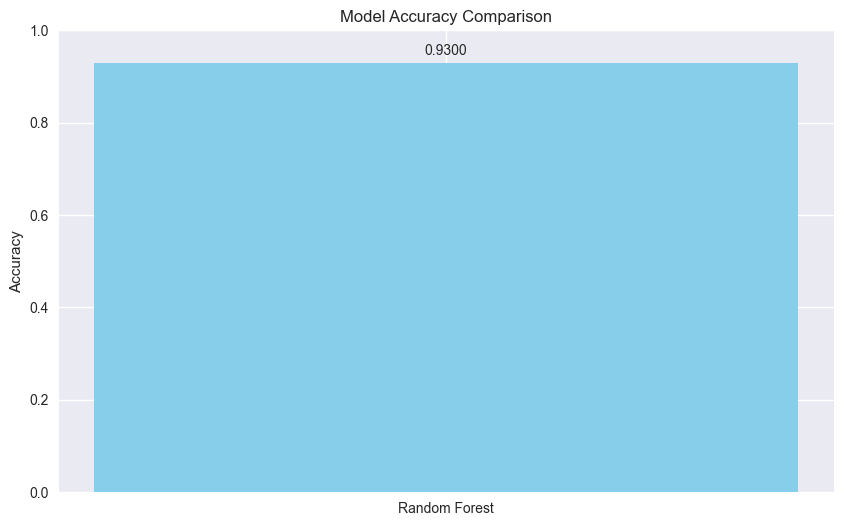

Model Performance Summary:
Random Forest: 0.9300


In [17]:
# Compare model accuracies
model_names = list(model_results.keys())
accuracies = [model_results[name]['accuracy'] for name in model_names]

plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, accuracies, color=['skyblue', 'skyblue'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)

# Add accuracy values on bars
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{acc:.4f}', ha='center', va='bottom')

plt.show()

print("Model Performance Summary:")
for name in model_names:
    print(f"{name}: {model_results[name]['accuracy']:.4f}")

In [18]:
# Sample predictions
sample_indices = np.random.choice(X_test.index, 5, replace=False)
sample_data = X_test.loc[sample_indices]
actual_labels = y_test.loc[sample_indices]

print("Sample Predictions:")
print("="*50)

for idx in sample_indices:
    print(f"\nSample {idx}:")
    print(f"Actual: {'Approved' if actual_labels[idx] == 1 else 'Rejected'}")
    
    for name, results in model_results.items():
        if name == 'Logistic Regression':
            pred_idx = list(X_test.index).index(idx)
            prediction = results['predictions'][pred_idx]
        else:
            prediction = results['model'].predict(sample_data.loc[[idx]])[0]
        
        pred_label = 'Approved' if prediction == 1 else 'Rejected'
        print(f"{name}: {pred_label}")

Sample Predictions:

Sample 524:
Actual: Approved
Random Forest: Approved

Sample 790:
Actual: Approved
Random Forest: Approved

Sample 378:
Actual: Approved
Random Forest: Approved

Sample 550:
Actual: Approved
Random Forest: Approved

Sample 602:
Actual: Approved
Random Forest: Approved


In [19]:
print("LOAN APPROVAL EDA & MODEL TRAINING SUMMARY")
print("="*50)
print(f"\nDataset Overview:")
print(f"- Total samples: {len(df)}")
print(f"- Features: {len(df.columns) - 1}")
print(f"- Loan approval rate: {(df['Loan_Status'] == 'Y').mean():.2%}")

print(f"\nKey Insights:")
print(f"- Credit history is the most important factor for loan approval")
print(f"- Married applicants have higher approval rates")
print(f"- Graduate applicants show better approval rates")
print(f"- Income-to-loan ratio is a significant predictor")

print(f"\nModel Performance:")
best_model = max(model_results.keys(), key=lambda x: model_results[x]['accuracy'])
print(f"- Best performing model: {best_model}")
print(f"- Best accuracy: {model_results[best_model]['accuracy']:.4f}")

print(f"\nRecommendations:")
print(f"- Focus on credit history verification")
print(f"- Consider income stability and total household income")
print(f"- Implement risk scoring based on multiple factors")
print(f"- Regular model retraining with new data")

LOAN APPROVAL EDA & MODEL TRAINING SUMMARY

Dataset Overview:
- Total samples: 1000
- Features: 12
- Loan approval rate: 91.80%

Key Insights:
- Credit history is the most important factor for loan approval
- Married applicants have higher approval rates
- Graduate applicants show better approval rates
- Income-to-loan ratio is a significant predictor

Model Performance:
- Best performing model: Random Forest
- Best accuracy: 0.9300

Recommendations:
- Focus on credit history verification
- Consider income stability and total household income
- Implement risk scoring based on multiple factors
- Regular model retraining with new data
